# Юнит 3, проект 3, Проект 3. О вкусной и здоровой пище

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

%matplotlib inline

In [251]:
import os
import math
import datetime
from datetime import datetime
from datetime import date as my_dt

In [3]:
import string
import collections

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import sys

In [5]:
from sklearn.model_selection import train_test_split  # Загружаем специальный инструмент для разбивки: 
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели

In [30]:
#np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', sys.maxsize)
pd.set_option('display.max_rows', sys.maxsize)

In [134]:
# разные вариаты для удобства отладки, включаю разные
pd.set_option('display.max_rows', 5) # показывать больше строк
pd.set_option('display.max_columns', 20) # показывать больше колонок

In [6]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

### Колонки

* Restaurant_id — идентификационный номер ресторана / сети ресторанов;
* City — город, в котором находится ресторан;
* Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
* Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
* Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
* Price Range — диапазон цен в ресторане;
* Number of Reviews — количество отзывов о ресторане;
* Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
* URL_TA — URL страницы ресторана на TripAdvisor;
* ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [284]:
# переменная модели для удобства вызова функций
model = RandomForestRegressor()

In [631]:
DATA_DIR = ''#'C:/skillfactory/git_sf_repo/skcourse_projects/module_3/'
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')
#print(len(df_train), len(df_test))
#df_train.sample(5)
#df_test.sample(5)

df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
    
df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [9]:
def data_reload():
    global df_train
    global df_test
    global df
    DATA_DIR = 'C:/skillfactory/git_sf_repo/skcourse_projects/module_3/'
    df_train = pd.read_csv(DATA_DIR+'main_task.csv')
    df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
    
    df_train['sample'] = 1 # помечаем где у нас трейн
    df_test['sample'] = 0 # помечаем где у нас тест
    df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

    df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [10]:
def data_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [414]:
def test_model(lst_del, score_var, df_var, pc=0.25):
    global model
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
    y = df_var[score_var]
    X = df_var.drop(lst_del, axis = 1)
    X = X.drop([score_var], axis = 1)
    #y = df_var[score_var]
    
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pc)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pc, random_state=RANDOM_SEED)
    
    # Создаём модель
    # regr = RandomForestRegressor(n_estimators=100)
    # model
    model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

    # Обучаем модель на тестовом наборе данных
    model.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = model.predict(X_test)
    
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    mean_err = metrics.mean_absolute_error(y_test, y_pred)
    print('MAE:', mean_err)
    #return mean_err

In [415]:
def test_model_local(lst_del, score_var, df_var, pc=0.25):
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
    y = df_var[score_var]
    X = df_var.drop(lst_del, axis = 1)
    X = X.drop([score_var], axis = 1)
    
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pc)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pc, random_state=RANDOM_SEED)
    
    # Создаём модель
    # regr = RandomForestRegressor(n_estimators=100)
    # model
    model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

    # Обучаем модель на тестовом наборе данных
    model.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = model.predict(X_test)
    
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    mean_err = metrics.mean_absolute_error(y_test, y_pred)
    print('MAE:', mean_err)
    #return mean_err

In [13]:
def save_model(model_in, test_data_in, save_v):
    predict_submission = model_in.predict(test_data_in)
    sample_submission['Rating'] = predict_submission
    if (save_v==1):
        sample_submission.to_csv('submission.csv', index=False)
    sample_submission.head(10)

In [14]:
# функция распечатки значений матрицы корреляций выше заданного
def print_corr_over_threshold(correlation_in, threshold_in):
    np.fill_diagonal(correlation_in.values, -2)
    for i, ii in zip(correlation_in.columns, enumerate(correlation_in.columns)):
        for j, jj in zip(correlation_in.columns, enumerate(correlation_in.columns)):
            if (i==j):
                continue
            if (ii < jj):
                continue
            if (abs(correlation_in[i][j]) > threshold_in and abs(correlation_in[i][j]) < 2):
                print(i, '\t', j, '\t', correlation_in[i][j])

In [15]:
# нарисовать heatmap корреляци, вывести все пары выше заданных двух порогов - явной корреляции и хоть какой-то для интереса
# параметр второго порога пока отключен
def correlation_workflow(input_df, threshold_in1, threshold_in2, sz_in=15):
    correlation_input_df = input_df.corr()
    print(correlation_input_df)
    
    annot_kws1 = {"ha": 'center',"va": 'bottom', 'color':'black'}

    sns.heatmap(correlation_input_df, annot=True, cmap='coolwarm', annot_kws=annot_kws1)
    sz = sz_in
    if (len(input_df.columns) > 12):
        sz = 20
    fig = plt.gcf().set_size_inches(sz, sz)
    print("---------Correlated---------")
    print_corr_over_threshold(correlation_input_df, threshold_in1)
    print('---------end--------')
    #print("---------Just something correlated---------")
    #print_corr_over_threshold(correlation_input_df, threshold_in2)
    #print('---------end--------')

In [326]:
# проход по колонкам и удаление не участвующих в создании модели
def set_cols_to_del(df_in, lst_keep):
    lst_del = []
    for cc in df_in.columns:
        if cc not in lst_keep:
            lst_del.append(cc)
    return lst_del

In [446]:
# отрисовка с указанием значений квантилей, минимумов и максимумов
def pic_global(what_to_pic, bins_here, range_left=-1, range_right=-1):
    IQR = what_to_pic.quantile(0.75) - what_to_pic.quantile(0.25)
    perc25 = what_to_pic.quantile(0.25)
    perc75 = what_to_pic.quantile(0.75)

    perc_min = what_to_pic.min()
    perc_max = what_to_pic.max()
    
    rl = range_left
    rr = range_right
    if (range_right == -1):
        rr = perc_max
    if (range_left == -1):
        rl = perc_min
        
    print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR),
    'минимум: {},'.format(perc_min),
    'максимум: {},'.format(perc_max))

    what_to_pic.loc[what_to_pic.between(rl, rr)].hist(
        alpha = 0.5, bins = bins_here, range = (rl, rr), label = 'All')
    
    plt.legend();
    
    return (IQR, perc25, perc75)

In [596]:
# функция сохранения файла результата
def save_result(test_data_in, predict_submission_precision_in, file_name):
    sample_submission = pd.DataFrame()
    sample_submission['Restaurant_id'] = test_data['Restaurant_id']
    sample_submission['Rating'] = predict_submission_precision_in
    sample_submission.to_csv(file_name+'.csv', index=False)

In [ ]:
# создание номерного признака для Restaurant_id
def rest_id_to_num(rest_id_str):
    parts = rest_id_str.split('_')
    id_num = int(parts[1])
    return id_num

In [642]:
dfXXX = pd.DataFrame()

In [637]:
# функция разницы между строками, там где разница пишет значение вида "значение1 Vs значение2"
# на вход датафрейм (sub так как вызываться должно после выборки по колонке key_col), key_col - колонка для 
# одинаковых значений которой и ищется разница
def print_diffs_2rows(input_subdf, key_col):
    global dfXXX
    has_diffs_global = False
    for i in range(0, len(input_subdf)-1):
        #print(i)
        irow = input_subdf.iloc[i]
        for j in range(i+1, len(input_subdf)):
            #print(j)
            jrow = input_subdf.iloc[j]
            diffrow = irow.copy()
            has_diffs = False
            for nn in input_subdf.columns:
                if (nn == key_col):
                    diffrow[nn] = irow[nn]
                    continue
                    
                if ((pd.isnull(irow[nn]) == True and pd.isnull(irow[nn]) == True) or (irow[nn] == jrow[nn])):
                    #diffrow[nn] = irow[nn]
                    diffrow[nn] = np.nan
                else:
                    has_diffs = True
                    has_diffs_global = True
                    diffrow[nn] = '"' + str(irow[nn]) + '" Vs "' + str(jrow[nn]) + '"'

            if (has_diffs == True):
                dfXXX = dfXXX.append(diffrow)

In [638]:
# функция разницы между всеми строками по всем значениям колонки key_col_in в датафрейме df_in для 
# списка повторяющихся значений v_in
def get_diff_all_rows(v_in, df_in, key_col_in):
    global dfXXX
    for t in range(0, len(v_in)):
        #print('v_in.index[t]' , v_in.index[t])
        t_rest =  df_in.loc[df_in[key_col_in]==v_in.index[t]]
        #print(t_rest)
        print_diffs_2rows(t_rest, key_col_in)
    dfXXX = dfXXX.reset_index()
    return dfXXX

In [651]:
# полная функция разницы между всеми строками по всем значениям колонки key_col_in в датафрейме df_in для 
# списка повторяющихся значений v_in
def get_nice_diff_for_column(v_in, df_in, key_col_in):
    global dfXXX
    dfXXX = pd.DataFrame(columns=df_in.columns)
    res = get_diff_all_rows(v_in, df_in, key_col_in)
    res = res.dropna(axis=1, how='all')
    #print(res)
    return res

In [664]:
# создание номерного признака для ID_TA
def idta_to_num(rest_id_str):
    idta_num = int(rest_id_str[1:])
    return idta_num

In [676]:
df_train.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Restaurant_id_NUM,ID_TA_NUM
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,1,5569,1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,1535,7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,352,8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1,3456,1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1,615,6864963


## Убираем NaN и заполняем где надо как-то разумно

                    Ranking    Rating  Number of Reviews
Ranking            1.000000 -0.368371          -0.222670
Rating            -0.368371  1.000000           0.030964
Number of Reviews -0.222670  0.030964           1.000000
---------Correlated---------
---------end--------


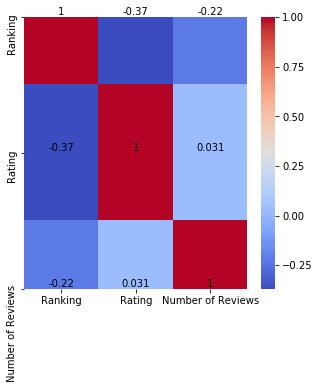

In [633]:
# посмотрим корреляцию в лоб
correlation_workflow(df_train.drop(['sample'], axis=1), 0.7, 0.1, 5)

In [602]:
# пока ничего не видно

### Restaurant_id

In [603]:
df_train['Restaurant_id'].value_counts().sort_index()

id_0       15
id_1        9
id_10      14
id_100     12
id_1000    11
           ..
id_999     11
id_9991     1
id_9992     2
id_9994     1
id_9995     2
Name: Restaurant_id, Length: 11909, dtype: int64

In [604]:
vc_sv_rest_id = df_train['Restaurant_id'].value_counts().sort_values()
vc_sv_rest_id

id_8616     1
id_4103     1
id_9790     1
id_6534     1
id_7992     1
           ..
id_534     17
id_227     18
id_436     18
id_633     18
id_871     18
Name: Restaurant_id, Length: 11909, dtype: int64

In [605]:
# как видно строк как пустых ячеек нет, странных значений тоже, кажется всё ок

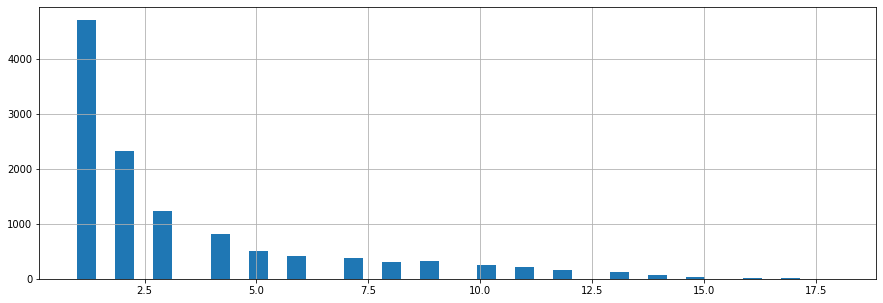

In [624]:
# посмотрим как много много-ресторанных id
df_train['Restaurant_id'].value_counts(dropna=True).hist(bins=40, figsize=(15,5))

In [607]:
# посмотрим что значит одинаковый 'Restaurant_id', возмем пять случайных и посмотрим на их города и кухни
vc_sv_many = vc_sv_rest_id[vc_sv_rest_id > 2].sample(5)
vc_sv_many

id_5191    4
id_23      9
id_6942    3
id_3916    4
id_2886    4
Name: Restaurant_id, dtype: int64

In [608]:
for t in range(0, len(vc_sv_many)):
    t_rest =  df_train.loc[df_train['Restaurant_id']==vc_sv_many.index[t]][['Restaurant_id', 'City', 'Cuisine Style']]
    print(t_rest)

      Restaurant_id    City                                      Cuisine Style
1111        id_5191    Rome                                                NaN
17270       id_5191   Milan  ['Italian', 'Pizza', 'Mediterranean', 'Vegetar...
17520       id_5191  London  ['Bar', 'British', 'Contemporary', 'Gluten Fre...
18337       id_5191  Madrid                                        ['Italian']
      Restaurant_id       City  \
3228          id_23     Lisbon   
9938          id_23  Ljubljana   
10957         id_23     Zurich   
13600         id_23    Hamburg   
16642         id_23     Munich   
22132         id_23     Berlin   
26397         id_23       Rome   
39646         id_23       Lyon   
39840         id_23     Madrid   

                                           Cuisine Style  
3228   ['Mediterranean', 'European', 'Portuguese', 'V...  
9938   ['Italian', 'Pizza', 'European', 'Vegetarian F...  
10957  ['Japanese', 'Sushi', 'Asian', 'Vegetarian Fri...  
13600  ['American', 'Steakho

In [609]:
# как видим - полное разнообразие, 'Restaurant_id' не говорит про сетевой ресторан, подумаем дальше

### City

In [610]:
df_train['City'].value_counts().sort_index()

Amsterdam     1086
Athens         628
Barcelona     2734
Berlin        2155
Bratislava     301
              ... 
Rome          2078
Stockholm      820
Vienna        1166
Warsaw         727
Zurich         538
Name: City, Length: 31, dtype: int64

In [611]:
# тут тоже всё ок

### Ranking

In [612]:
df_train['Ranking'].value_counts().sort_index()

1.0        15
2.0         9
3.0        14
4.0         8
5.0        13
           ..
16420.0     1
16435.0     1
16437.0     1
16441.0     1
16444.0     1
Name: Ranking, Length: 11936, dtype: int64

In [613]:
df_train['Ranking'].value_counts().sort_values()

5699.0      1
10638.0     1
8490.0      1
16381.0     1
14357.0     1
           ..
431.0      18
345.0      18
491.0      18
437.0      18
1080.0     19
Name: Ranking, Length: 11936, dtype: int64

In [614]:
# тут тоже всё ок

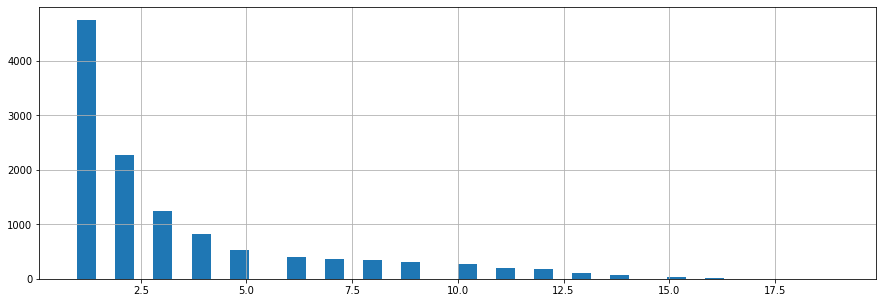

In [625]:
df_train['Ranking'].value_counts(dropna=True).hist(bins=40, figsize=(15,5))

In [616]:
# Очень похоже на Restaurant_Id
df_train[['Restaurant_id', 'Ranking']]

,Restaurant_id,Ranking
0,id_5569,5570.0
1,id_1535,1537.0
2,id_352,353.0
3,id_3456,3458.0
4,id_615,621.0
...,...,...
39995,id_499,500.0
39996,id_6340,6341.0
39997,id_1649,1652.0
39998,id_640,641.0


In [617]:
# Даже так бросается в глаза сходство o_O

In [618]:
# Сделаем номерной признак и подсчитаем корреляцию опять
#def rest_id_to_num(rest_id_str):
#    parts = rest_id_str.split('_')
#    id_num = int(parts[1])
#    return id_num

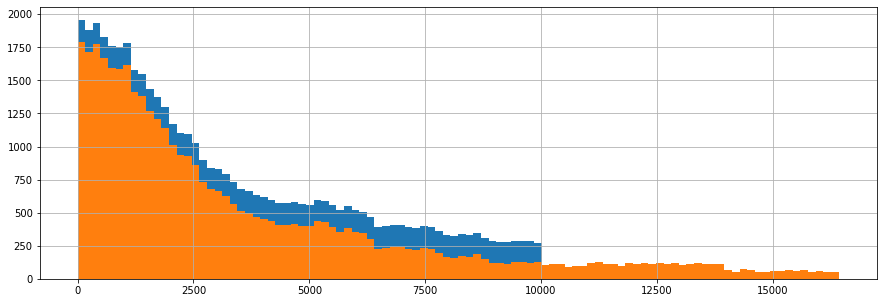

In [634]:
# Сделаем номерной признак и подсчитаем корреляцию опять
df['Restaurant_id_NUM'] = df['Restaurant_id'].apply(lambda x: rest_id_to_num(x))
df['Restaurant_id_NUM'].hist(bins=100, figsize=(15,5))

# это для корелляции
df_train['Restaurant_id_NUM'] = df_train['Restaurant_id'].apply(lambda x: rest_id_to_num(x))
df_train['Restaurant_id_NUM'].hist(bins=100, figsize=(15,5))

                    Ranking    Rating  Number of Reviews  Restaurant_id_NUM
Ranking            1.000000 -0.368371          -0.222670           1.000000
Rating            -0.368371  1.000000           0.030964          -0.368308
Number of Reviews -0.222670  0.030964           1.000000          -0.222637
Restaurant_id_NUM  1.000000 -0.368308          -0.222637           1.000000
---------Correlated---------
Restaurant_id_NUM 	 Ranking 	 0.9999995570800042
---------end--------


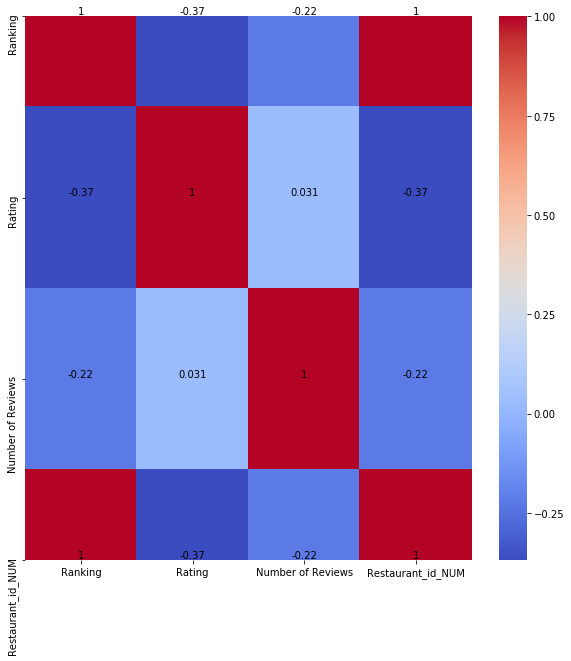

In [636]:
correlation_workflow(df_train.drop(['sample'], axis=1), 0.7, 0.1, 10)

### как видим - явная корелляция

### URL_TA

In [460]:
vc_sv = df_train['URL_TA'].value_counts().sort_values()
vc_sv

/Restaurant_Review-g189400-d3709131-Reviews-Myrovolos_Metaxourgeio-Athens_Attica.html    1
/Restaurant_Review-g187147-d3457832-Reviews-Paris_Nord_Cafe-Paris_Ile_de_France.html     1
                                                                                        ..
/Restaurant_Review-g187514-d8753348-Reviews-Tropecientos-Madrid.html                     2
/Restaurant_Review-g187514-d9802625-Reviews-La_Vie_en_Doux-Madrid.html                   2
Name: URL_TA, Length: 39980, dtype: int64

In [461]:
# дальше странная история, возьмем те которые больше раза встречаются 
vc_sv2 = vc_sv[vc_sv > 1]
vc_sv2

/Restaurant_Review-g187514-d987900-Reviews-Compostela_Restaurante-Madrid.html    2
/Restaurant_Review-g187514-d4600226-Reviews-Cafeteria_Teresa-Madrid.html         2
                                                                                ..
/Restaurant_Review-g187514-d8753348-Reviews-Tropecientos-Madrid.html             2
/Restaurant_Review-g187514-d9802625-Reviews-La_Vie_en_Doux-Madrid.html           2
Name: URL_TA, Length: 20, dtype: int64

In [462]:
# # функция разницы между строками, там где разница пишет значение вида "значение1 Vs значение2"
# def print_diffs_2rows(input_subdf, key_col):
#     global dfXXX
#     has_diffs_global = False
#     for i in range(0, len(input_subdf)-1):
#         #print(i)
#         irow = input_subdf.iloc[i]
#         for j in range(i+1, len(input_subdf)):
#             #print(j)
#             jrow = input_subdf.iloc[j]
#             diffrow = irow.copy()
#             has_diffs = False
#             for nn in input_subdf.columns:
#                 if (nn == key_col):
#                     diffrow[nn] = irow[nn]
#                     continue
                    
#                 if ((pd.isnull(irow[nn]) == True and pd.isnull(irow[nn]) == True) or (irow[nn] == jrow[nn])):
#                     #diffrow[nn] = irow[nn]
#                     diffrow[nn] = np.nan
#                 else:
#                     has_diffs = True
#                     has_diffs_global = True
#                     diffrow[nn] = '"' + str(irow[nn]) + '" Vs "' + str(jrow[nn]) + '"'

#             if (has_diffs == True):
#                 dfXXX = dfXXX.append(diffrow)

In [463]:
# # функция разницы между всеми строками
# def get_diff_all_rows(v_in, df_in, key_col_in):
#     global dfXXX
#     for t in range(0, len(v_in)):
#         #print('v_in.index[t]' , v_in.index[t])
#         t_rest =  df_in.loc[df_in[key_col_in]==v_in.index[t]]
#         #print(t_rest)
#         print_diffs_2rows(t_rest, key_col_in)
#     dfXXX = dfXXX.reset_index()
#     return dfXXX

In [464]:
pd.set_option('display.max_rows', 15) # показывать больше строк

In [653]:
# # смотрим разницу
# dfXXX = pd.DataFrame(columns=df.columns)
# res = get_diff_all_rows(vc_sv2, df_train, 'URL_TA')
# # убираем одинаковое
# res = res.dropna(axis=1, how='all')
# #print(res)
# res

In [652]:
get_nice_diff_for_column(vc_sv2, df_train, 'URL_TA')

,index,Restaurant_id,Ranking,URL_TA,Restaurant_id_NUM
0,8019,"""id_2361"" Vs ""id_2312""","""2363.0"" Vs ""2314.0""",/Restaurant_Review-g187514-d987900-Reviews-Com...,"""2361"" Vs ""2312"""
1,147,"""id_4110"" Vs ""id_4104""","""4112.0"" Vs ""4106.0""",/Restaurant_Review-g187514-d4600226-Reviews-Ca...,"""4110"" Vs ""4104"""
2,25251,"""id_3575"" Vs ""id_3709""","""3577.0"" Vs ""3711.0""",/Restaurant_Review-g187514-d3161682-Reviews-Ce...,"""3575"" Vs ""3709"""
3,15295,"""id_475"" Vs ""id_530""","""476.0"" Vs ""531.0""",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,"""475"" Vs ""530"""
4,10819,"""id_2197"" Vs ""id_2329""","""2199.0"" Vs ""2331.0""",/Restaurant_Review-g187514-d11921719-Reviews-C...,"""2197"" Vs ""2329"""
...,...,...,...,...,...
15,5240,"""id_2406"" Vs ""id_2487""","""2408.0"" Vs ""2489.0""",/Restaurant_Review-g187514-d793170-Reviews-Car...,"""2406"" Vs ""2487"""
16,26431,"""id_3238"" Vs ""id_3240""","""3240.0"" Vs ""3242.0""",/Restaurant_Review-g187514-d11698990-Reviews-V...,"""3238"" Vs ""3240"""
17,15525,"""id_3967"" Vs ""id_4331""","""3969.0"" Vs ""4333.0""",/Restaurant_Review-g187514-d7809594-Reviews-La...,"""3967"" Vs ""4331"""
18,13942,"""id_1103"" Vs ""id_1212""","""1104.0"" Vs ""1213.0""",/Restaurant_Review-g187514-d8753348-Reviews-Tr...,"""1103"" Vs ""1212"""


In [654]:
pd.set_option('display.max_rows', 5) # показывать больше строк

In [655]:
# глянем пример этих самых id
df_train.loc[df['Restaurant_id']=='id_4110']

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Restaurant_id_NUM
4110,id_1312,Milan,"['Italian', 'Bar', 'Vegetarian Friendly']",1314.0,3.5,$$ - $$$,578.0,[['Great place to end a perfect night in Mila....,/Restaurant_Review-g187849-d1319744-Reviews-Le...,d1319744,1,1312
10147,id_627,Vienna,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",628.0,4.0,$$ - $$$,91.0,"[['Tasty big pizza!', 'Really tasty pizza'], [...",/Restaurant_Review-g190454-d10386740-Reviews-R...,d10386740,1,627
28172,id_677,Dublin,"['Irish', 'Steakhouse', 'European', 'Healthy',...",678.0,4.5,$$ - $$$,79.0,"[['Brilliant as always', ""Don't know why it's ...",/Restaurant_Review-g186605-d7099464-Reviews-Vi...,d7099464,1,677


In [656]:
df_train.loc[df['Restaurant_id']=='id_4104']

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Restaurant_id_NUM
4104,id_2981,Lisbon,NaN,2984.0,3.5,NaN,6.0,[['Pastries delicious but cappuccino not so g....,/Restaurant_Review-g189158-d12446122-Reviews-A...,d12446122,1,2981
17897,id_9669,London,['British'],9678.0,4.0,$,29.0,"[['Bartender likes to dance', 'They are workin...",/Restaurant_Review-g186338-d2328501-Reviews-Du...,d2328501,1,9669
19446,id_521,Lisbon,"['Mediterranean', 'European', 'Healthy', 'Port...",522.0,5.0,$$ - $$$,43.0,"[['Supper', 'Absolutely the best restaurant in...",/Restaurant_Review-g189158-d10317163-Reviews-B...,d10317163,1,521


##### Неясность Restaurant_id была обсуждена выше, тут по-прежнему непонятно. Так как строки явно дублируются, возможно это просто какие-то ошибки обновления БД...

### ID_TA

In [657]:
vc_id_ta = df_train['ID_TA'].value_counts().sort_values()
vc_id_ta

d1153576     1
d11906521    1
            ..
d1315077     2
d11674463    2
Name: ID_TA, Length: 39980, dtype: int64

In [658]:
# тут тоже всё ок

In [471]:
# дальше такая же странная история как и раньше, возьмем те которые больше раза встречаются 
vc_id_ta2 = vc_id_ta[vc_id_ta > 1]
vc_id_ta2

d11921719    2
d11698990    2
            ..
d1315077     2
d11674463    2
Name: ID_TA, Length: 20, dtype: int64

In [661]:
pd.set_option('display.max_rows', 15) # показывать больше строк

In [473]:
# # смотрим разницу
# dfXXX = pd.DataFrame(columns=df.columns)
# #print(dfXXX)
# col_name = 'ID_TA'
# res = get_diff_all_rows(vc_id_ta2, df_train, col_name)
# res = res.dropna(axis=1, how='all')
# res

,index,Restaurant_id,Ranking,ID_TA,Restaurant_id_NUM
0,10819,"""id_2197"" Vs ""id_2329""","""2199.0"" Vs ""2331.0""",d11921719,"""2197"" Vs ""2329"""
1,26431,"""id_3238"" Vs ""id_3240""","""3240.0"" Vs ""3242.0""",d11698990,"""3238"" Vs ""3240"""
2,22924,"""id_2359"" Vs ""id_2467""","""2361.0"" Vs ""2469.0""",d7342803,"""2359"" Vs ""2467"""
3,10183,"""id_1225"" Vs ""id_1197""","""1227.0"" Vs ""1198.0""",d7337366,"""1225"" Vs ""1197"""
4,13980,"""id_3239"" Vs ""id_3242""","""3241.0"" Vs ""3244.0""",d10047799,"""3239"" Vs ""3242"""
...,...,...,...,...,...
15,16920,"""id_3536"" Vs ""id_3662""","""3538.0"" Vs ""3664.0""",d11999956,"""3536"" Vs ""3662"""
16,13942,"""id_1103"" Vs ""id_1212""","""1104.0"" Vs ""1213.0""",d8753348,"""1103"" Vs ""1212"""
17,3942,"""id_5646"" Vs ""id_5617""","""5649.0"" Vs ""5620.0""",d3685055,"""5646"" Vs ""5617"""
18,10439,"""id_468"" Vs ""id_511""","""469.0"" Vs ""512.0""",d1315077,"""468"" Vs ""511"""


In [662]:
get_nice_diff_for_column(vc_id_ta2, df_train, 'ID_TA')

,index,Restaurant_id,Ranking,ID_TA,Restaurant_id_NUM
0,10819,"""id_2197"" Vs ""id_2329""","""2199.0"" Vs ""2331.0""",d11921719,"""2197"" Vs ""2329"""
1,26431,"""id_3238"" Vs ""id_3240""","""3240.0"" Vs ""3242.0""",d11698990,"""3238"" Vs ""3240"""
2,22924,"""id_2359"" Vs ""id_2467""","""2361.0"" Vs ""2469.0""",d7342803,"""2359"" Vs ""2467"""
3,10183,"""id_1225"" Vs ""id_1197""","""1227.0"" Vs ""1198.0""",d7337366,"""1225"" Vs ""1197"""
4,13980,"""id_3239"" Vs ""id_3242""","""3241.0"" Vs ""3244.0""",d10047799,"""3239"" Vs ""3242"""
...,...,...,...,...,...
15,16920,"""id_3536"" Vs ""id_3662""","""3538.0"" Vs ""3664.0""",d11999956,"""3536"" Vs ""3662"""
16,13942,"""id_1103"" Vs ""id_1212""","""1104.0"" Vs ""1213.0""",d8753348,"""1103"" Vs ""1212"""
17,3942,"""id_5646"" Vs ""id_5617""","""5649.0"" Vs ""5620.0""",d3685055,"""5646"" Vs ""5617"""
18,10439,"""id_468"" Vs ""id_511""","""469.0"" Vs ""512.0""",d1315077,"""468"" Vs ""511"""


In [474]:
pd.set_option('display.max_rows', 5) # показывать больше строк

### Видно, что с ID_TA то же самое (те же повторы/пересечения) что и с URL_TA. При этом ID_TA это какие-то цифры, попробуем сделать из него числовой признак

In [494]:
# # Сделаем номерной признак и подсчитаем корреляцию опять
# def idta_to_num(rest_id_str):
#     idta_num = int(rest_id_str[1:])
#     return idta_num

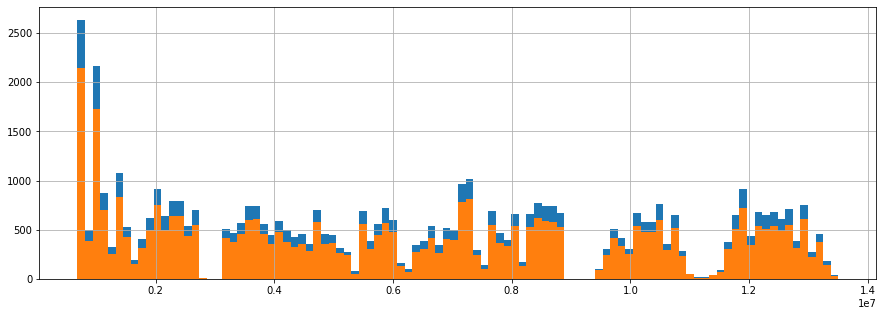

In [666]:
# Сделаем номерной признак и подсчитаем корреляцию опять
df['ID_TA_NUM'] = df['ID_TA'].apply(lambda x: idta_to_num(x))
df['ID_TA_NUM'].hist(bins=100, figsize=(15,5))

# это для корелляции
df_train['ID_TA_NUM'] = df_train['ID_TA'].apply(lambda x: idta_to_num(x))
df_train['ID_TA_NUM'].hist(bins=100, figsize=(15,5))

                    Ranking    Rating  Number of Reviews  Restaurant_id_NUM  \
Ranking            1.000000 -0.368371          -0.222670           1.000000   
Rating            -0.368371  1.000000           0.030964          -0.368308   
Number of Reviews -0.222670  0.030964           1.000000          -0.222637   
Restaurant_id_NUM  1.000000 -0.368308          -0.222637           1.000000   
ID_TA_NUM          0.048826  0.159111          -0.286309           0.048820   

                   ID_TA_NUM  
Ranking             0.048826  
Rating              0.159111  
Number of Reviews  -0.286309  
Restaurant_id_NUM   0.048820  
ID_TA_NUM           1.000000  
---------Correlated---------
Restaurant_id_NUM 	 Ranking 	 0.9999995570800042
---------end--------


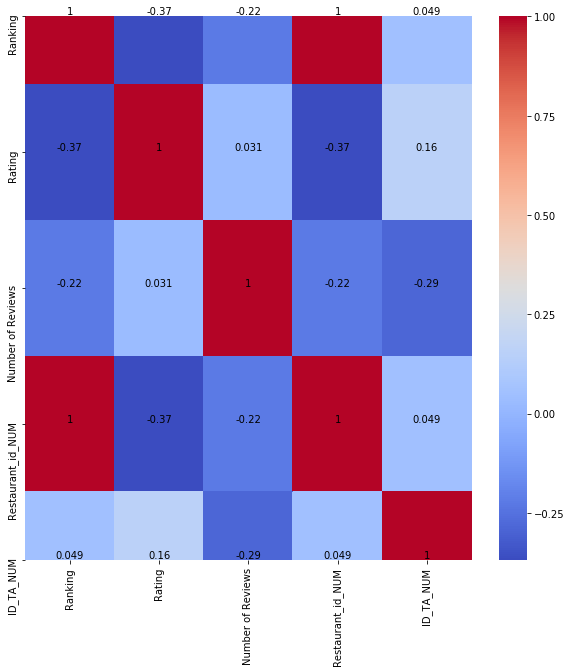

In [668]:
correlation_workflow(df_train.drop(['sample'], axis=1), 0.7, 0.1, 10)

In [669]:
# ничего нового пока

### Cuisine

In [709]:
# созадние нового столбца списка кухонь
def get_cuisines_list(row_next):
    #global all_cuisine_types
    if (pd.isnull(row_next['Cuisine Style'])==True):
        #all_cuisine_types['__unknown'] += 1
        return ['__unknown']
    next_cuisines = row_next['Cuisine Style'][1:-1].replace("'","").replace(", ",",").split(',')
    #for nc in next_cuisines:
    #    all_cuisine_types[nc] += 1
    return next_cuisines

In [686]:
# подсчет количества кухонь
def get_cuisines_count(row_next):
    if ( (len(row_next['cuisine_list']) == 1) and (row_next['cuisine_list'][0]=='__unknown')):
        return 0

    return len(row_next['cuisine_list'])

In [687]:
# созадние нового столбца вида 0/1
def check_cuisine_nan(row_next):
    if (row_next['cuisine_count'] == 0):
        return 1
    return 0

In [708]:
def gather_cuisines(row_next):
    global all_cuisine_types
    if (row_next['cuisine_count'] == 0):
        all_cuisine_types['__unknown'] += 1
        return
    for nc in row_next['cuisine_list']:
        all_cuisine_types[nc] += 1
    return

In [710]:
# найдем частоты всех кухонь
all_cuisine_types = collections.Counter()
# выключаем предупреждение - здесь создаем колонку, никаких chained-операций
pd.options.mode.chained_assignment = None
# делаем новые колонки
df['cuisine_list'] = df.apply(
    (lambda row: get_cuisines_list(row)), axis=1)
df['cuisine_count'] = df.apply(
     (lambda row: get_cuisines_count(row)), axis=1)
df['cuisine_nan'] = df.apply(
     (lambda row: check_cuisine_nan(row)), axis=1)
df.apply(
     (lambda row: gather_cuisines(row)), axis=1)
pd.options.mode.chained_assignment = 'warn'

In [714]:
len(all_cuisine_types), all_cuisine_types.most_common(126)

(126,
 [('Vegetarian Friendly', 14021),
  ('European', 12561),
  ('__unknown', 11590),
  ('Mediterranean', 7820),
  ('Italian', 7433),
  ('Vegan Options', 5684),
  ('Gluten Free Options', 5185),
  ('Bar', 4094),
  ('French', 3970),
  ('Asian', 3786),
  ('Pizza', 3502),
  ('Spanish', 3456),
  ('Pub', 3058),
  ('Cafe', 2883),
  ('Fast Food', 2122),
  ('British', 1992),
  ('International', 1966),
  ('Seafood', 1878),
  ('Japanese', 1860),
  ('Central European', 1727),
  ('American', 1642),
  ('Sushi', 1450),
  ('Chinese', 1446),
  ('Portuguese', 1385),
  ('Indian', 1328),
  ('Middle Eastern', 980),
  ('Thai', 923),
  ('Wine Bar', 877),
  ('German', 820),
  ('Halal', 773),
  ('Greek', 768),
  ('Healthy', 758),
  ('Fusion', 748),
  ('Czech', 745),
  ('Steakhouse', 729),
  ('Barbecue', 710),
  ('Contemporary', 652),
  ('Soups', 630),
  ('Eastern European', 629),
  ('Vietnamese', 622),
  ('Grill', 617),
  ('Gastropub', 608),
  ('Turkish', 574),
  ('Mexican', 572),
  ('South American', 490),
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018343B323C8>]],
      dtype=object)

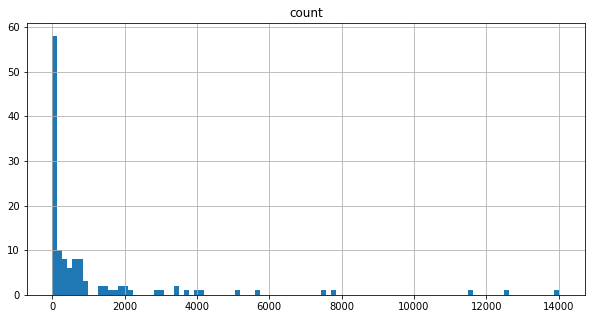

In [712]:
df_act = pd.DataFrame.from_dict(all_cuisine_types, orient='index').reset_index()
df_act = df_act.rename(columns={'index':'cuisine', 0:'count'})
df_act.hist(bins=100, figsize=(10, 5))

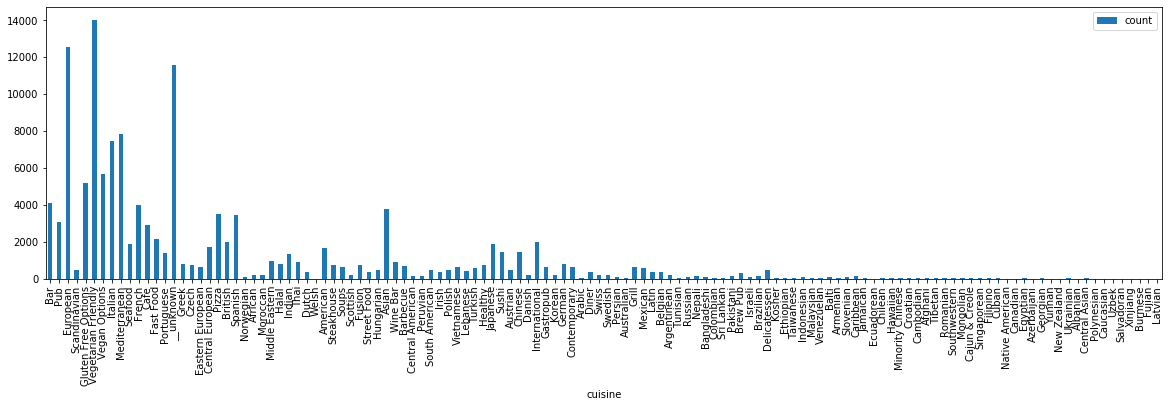

In [713]:
df_act.plot(kind='bar', figsize=(20,5), y='count', x='cuisine')

In [715]:
# продублируем для df_train
# выключаем предупреждение - здесь создаем колонку, никаких chained-операций
pd.options.mode.chained_assignment = None
# делаем новые колонки
df_train['cuisine_list'] = df_train.apply(
    (lambda row: get_cuisines_list(row)), axis=1)
df_train['cuisine_count'] = df_train.apply(
     (lambda row: get_cuisines_count(row)), axis=1)
df_train['cuisine_nan'] = df_train.apply(
     (lambda row: check_cuisine_nan(row)), axis=1)
pd.options.mode.chained_assignment = 'warn'

### Price Range

In [505]:
pr_vc = df['Price Range'].value_counts(dropna=False)
pr_vc

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [506]:
# перекодируем для графика
pr_vc_ren = pr_vc.rename({'$$ - $$$': 2.5, '$': 1, '$$$$': 4}).sort_index()
pr_vc_ren

1.0     7816
2.5    23041
4.0     1782
NaN    17361
Name: Price Range, dtype: int64

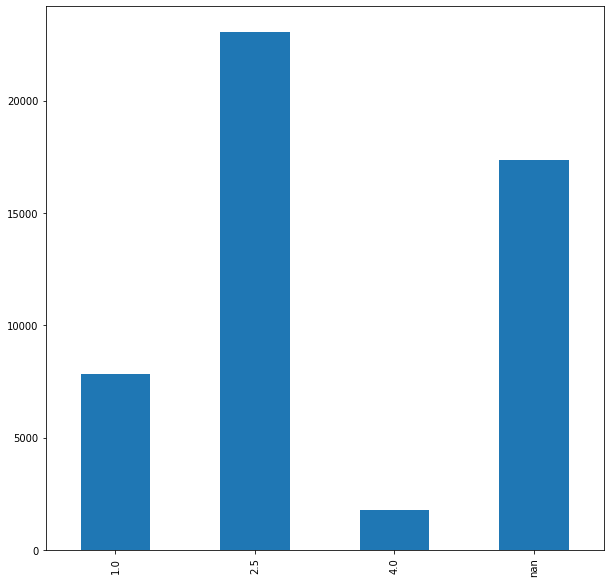

In [507]:
pr_vc_ren.plot(kind='bar')

In [508]:
encode = {'$$ - $$$': 2.5, '$': 1, '$$$$': 4, np.nan: 2.5}

In [509]:
# Предположим, что Nan это самое частое (т.е. нормальное распределение цен) = 2.5
# Также надо убрать Nan. Чтобы не потерять эту информацию создадим столбец if_price_range_nan
df['if_price_range_nan'] = df.apply(
    (lambda row: 1 if (pd.isnull(row['Price Range'])==True) else 0), axis=1)
df['price_range_NUM'] = df.apply(
    (lambda row: encode[row['Price Range']] if (pd.isnull(row['Price Range'])!=True) else pr_vc_ren.idxmax()), axis=1)

### Reviews, Number of Reviews

In [511]:
rv_vc = df['Reviews'].value_counts(dropna=False)
rv_vc

[[], []]                                                                                                                8112
NaN                                                                                                                        2
                                                                                                                        ... 
[['The best Lebanese food in Geneva so far', 'Wonderful experience at Street Beirut'], ['01/08/2018', '01/03/2018']]       1
[['Great Indian food near Kurfürstendam', 'The full experience'], ['01/07/2018', '01/07/2018']]                            1
Name: Reviews, Length: 41858, dtype: int64

In [512]:
nor = df[df['Reviews']=="[[], []]"][['Reviews','Number of Reviews']]
nor

,Reviews,Number of Reviews
0,"[[], []]",4.0
6,"[[], []]",2.0
...,...,...
49991,"[[], []]",5.0
49994,"[[], []]",6.0


In [513]:
nor[pd.isnull(nor['Number of Reviews'])]

,Reviews,Number of Reviews
7,"[[], []]",NaN
25,"[[], []]",NaN
...,...,...
49986,"[[], []]",NaN
49988,"[[], []]",NaN


In [514]:
pd.set_option('display.max_rows', 10) # показывать больше строк
df['Number of Reviews'].describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

In [515]:
df['Number of Reviews'].median(), df['Number of Reviews'].mode()

(33.0, 0    2.0
 dtype: float64)

In [516]:
nor_vc = df['Number of Reviews'].value_counts(dropna=False)
nor_vc

NaN       3200
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: Number of Reviews, Length: 1574, dtype: int64

In [517]:
pd.set_option('display.max_rows', 5) # показывать меньше строк

In [522]:
# очистка значения из колонки Reviews и получение дат
def fmt_str_test(input_str):
    if (pd.isnull(input_str)==True):
        return (False, )
    
    half_view = input_str.split('], [')
    
    if (len(half_view) != 2):
        print('half_view', len(half_view), half_view) 
        return (False, )
    
    sec_part = half_view[1].replace("[","").replace("]","").replace(", ",",").replace("'","").split(',')
    
    if (len(sec_part) == 1):
        if (len(sec_part[0]) == 10):
            dt1 = pd.to_datetime(sec_part[0], dayfirst=False, errors ='raise')
            return (True, dt1)
        else:
            return (False, )
    
    if (len(sec_part) == 2):
        if (len(sec_part[1]) == 10):
            dt1 = pd.to_datetime(sec_part[0], dayfirst=False, errors ='raise')
            dt2 = pd.to_datetime(sec_part[1], dayfirst=False, errors ='raise')
            
    if (dt1 >= dt2):
        return (True, dt1, dt2)
    
    return (True, dt2, dt1)

In [523]:
# функция для преобразования колонки Reviews
def fmt_rev(input_row):
    #print(type(input_str))
    input_str = input_row['Reviews']
    res = fmt_str_test(input_str)
    if (res[0] == True):
        return res[1]
    
    return np.nan

In [524]:
df['latest_review'] = df.apply(
    (lambda row: fmt_rev(row)), axis=1)

In [593]:
#df['latest_review'].value_counts(dropna=False).sort_index()

In [527]:
# создаем новую колонку как количество дней между последним отзывом и стартом сайта
#(симметрично можно было между текущей датой и датой отзыва)
# дата взята как год спустя основания TripAdvisor
fill_val = pd.Timestamp(year=2001, month=1, day=1, hour=12)  #my_dt(2001,1,1)
df['latest_review'] = df['latest_review'].apply(
    (lambda val: (val-fill_val).total_seconds()/86400 if (pd.isnull(val)!=True) else 0))

In [594]:
#df['latest_review'].value_counts(dropna=False).sort_index()

25-й перцентиль: 9.0, 75-й перцентиль: 115.0, IQR: 106.0,  Границы выбросов: [-150.0, 274.0]. минимум: 2.0, максимум: 9660.0,


(106.0, 9.0, 115.0)

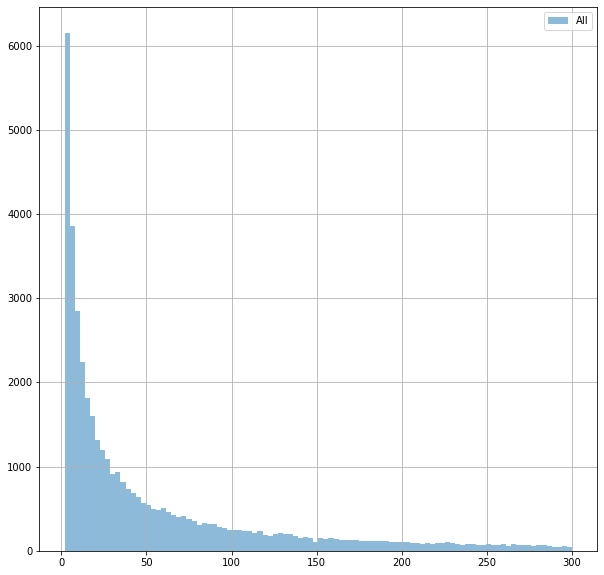

In [532]:
pic_global(df['Number of Reviews'], 100, -1, 300)

In [535]:
# создадим новую колонку без Nan по наиболее часто встречающемуся значению
df['real_number_of_reviews'] = df['Number of Reviews']
df['real_number_of_reviews'].fillna(value=2.0, inplace=True)

## Вызов модели

In [562]:
train_data = df.query('sample == 1').drop(['sample'], axis=1)
test_data = df.query('sample == 0').drop(['sample'], axis=1)

In [546]:
lst_cols = ['Ranking', 'Restaurant_id_NUM','cuisine_count', 'cuisine_nan', 'if_price_range_nan', 'price_range_NUM', 'latest_review','real_number_of_reviews']
lst_keep = lst_cols.copy()
lst_keep.append('Rating')
lst_del = set_cols_to_del(train_data, lst_keep)
test_model(lst_del, 'Rating', train_data, pc=0.25)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s


MAE: 0.3811783083333333


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


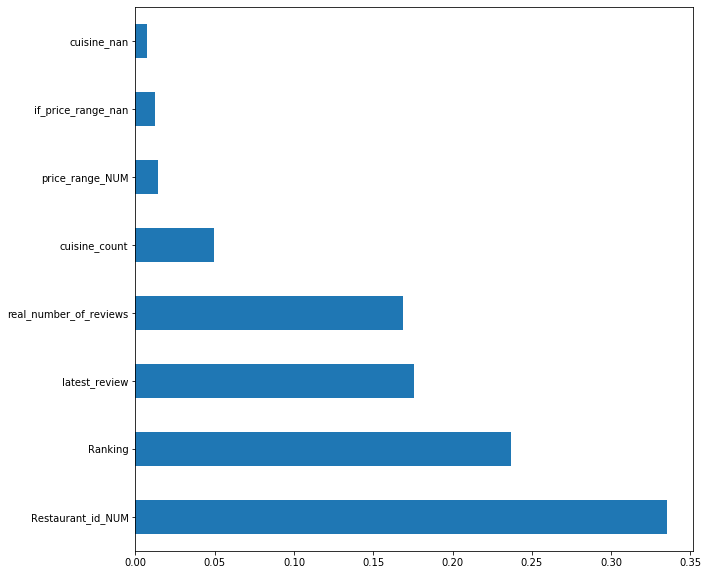

In [547]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=lst_cols)
feat_importances.nlargest(30).plot(kind='barh');

## Предсказание

In [563]:
test_data = test_data.drop(['Rating'], axis=1)

In [564]:
test_data_model = test_data.drop(lst_del, axis = 1)

In [556]:
predict_submission = model.predict(test_data_model)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [557]:
predict_submission

array([3.99, 4.5 , 4.35, ..., 4.14, 4.32, 3.68])

In [568]:
# рейтинг кратен 0.5
predict_submission_precision = np.round(predict_submission * 2) / 2

In [569]:
predict_submission_precision

array([4. , 4.5, 4.5, ..., 4. , 4.5, 3.5])

### Cравним графики для уверенности

(array([  201.,   139.,   466.,   915.,     0.,  2955.,  6824., 13692.,
        10929.,  3879.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

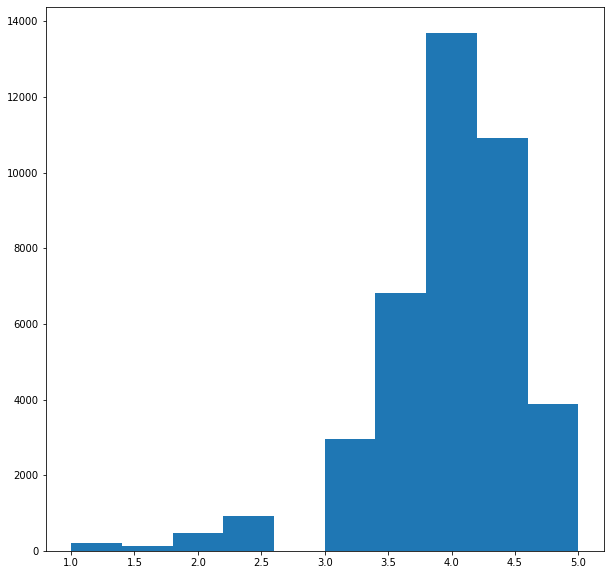

In [587]:
plt.hist(train_data['Rating'], bins = 10)

(array([  21.,   67.,    0.,  441.,    0., 2886., 5717.,    0.,  861.,
           7.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <a list of 10 Patch objects>)

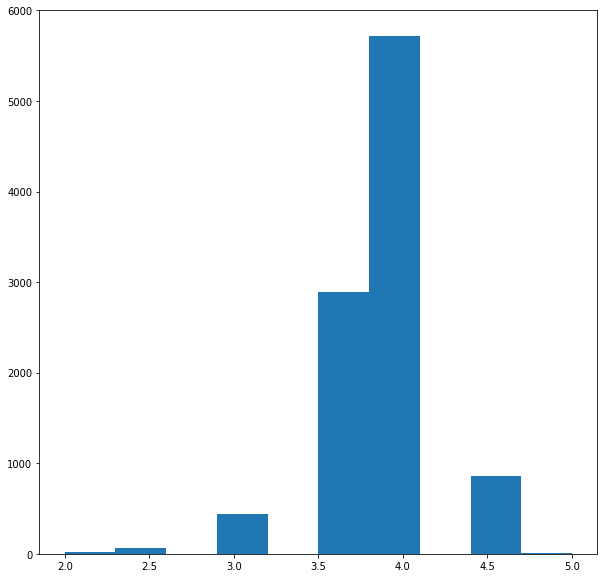

In [590]:
plt.hist(predict_submission_precision, bins = 10)

## Сохранение результата

In [598]:
save_result(test_data, predict_submission_precision, 'submission02')

## TO DO - на будущее - разное сделано но не соединено

### 1) Парсинг и фильтрация слов обзоров (есть)
### 2) Загрузка скачанного датасета (есть) с полярностью (позитивностью) речи

## TO DO - не сделано но хочется

### 1) про парсинг - сделать проверку отрицания ( "not so good", например) и оценивать позитивность
### 2) оценивать место ресторана в шкале города 

In [158]:
all_words = set()

In [202]:
def fmt_str_test(input_str):
    global all_words
    #print(type(input_str))
    #input_str = input_row['Reviews']
    #clean_view = str(input_str).replace("[","").replace("]","").replace(", ",",").replace("'","")
    #print(input_str)
    half_view = input_str.split('], [')
    
    if (len(half_view) != 2):
        print('half_view', len(half_view), half_view) 
        return (False, )
    
    #print('half_view', half_view[0])
    
    #sec_part = half_view[0].replace("[","").replace("]","").replace(","," ").replace("  "," ").split(' ')
    
    #txt = "Hello Sam!"
    mytable = half_view[0].maketrans("", "", string.punctuation)
    #print(txt.translate(mytable))

    translated = half_view[0].translate(mytable)
    sec_part = translated.split(' ')
    
    
    #if (len(sec_part) != 2):
    #print('sec_part', len(sec_part), sec_part) 
        #return
        
    finn = set([sstr for sstr in sec_part if (len(sstr)>3 and not any(elem in sstr for elem in "1234567890"))])
    #print('finn', len(finn), finn)
    #print('all_words', len(all_words), all_words)
    all_words.update(finn)

    return (True, finn)

In [175]:
def fmt_rev(input_row):
    #print(type(input_str))
    input_str = input_row['Reviews']
    if (pd.isnull(input_str)==True):
        return "bad"
    res = fmt_str_test(input_str)
    if (res[0] == True):
        return "good"
    
    return "bad"

In [204]:
df_w = df.copy()

In [205]:
def get_words(df_to):
    pd.options.mode.chained_assignment = None
    # делаем новую колонку - массив директоров, а не строку
    df_to.apply((lambda row: fmt_rev(row)), axis=1)
    # включаем предупреждение обратно
    pd.options.mode.chained_assignment ='warn'

In [206]:
all_words = set()
get_words(df_w)
all_words = sorted(all_words)
print(type(all_words), len(all_words))
#all_words

<class 'list'> 19078


In [207]:
with open("words.txt", "w", encoding="utf-8") as write_file:
    for t in all_words:
        write_file.write(t+'\n')

In [169]:
df_w.iloc[8168]

Restaurant_id                                                  id_8168
City                                                            Lisbon
Cuisine Style                                                      NaN
Ranking                                                           3389
Price Range                                                        NaN
Number of Reviews                                                    2
Reviews                                                            NaN
URL_TA               /Restaurant_Review-g189158-d12683988-Reviews-O...
ID_TA                                                        d12683988
Rating                                                             NaN
Name: 8168, dtype: object

In [203]:
all_words = set()
# выключаем предупреждение - здесь создаем колонку, никаких chained-операций
pd.options.mode.chained_assignment = None
# делаем новую колонку - массив директоров, а не строку
test_part['arr'] = test_part.apply(
    (lambda row: fmt_rev(row)), axis=1)
# включаем предупреждение обратно
pd.options.mode.chained_assignment ='warn'
# размножаем/дублируем строки так, чтобы в каждой строке был один режиссер
#df_cuis_copy_nn_exploded = df_cuis_copy_nn.explode('cuisine')
#test_part
all_words = sorted(all_words)
all_words

['Delicious',
 'Excellent',
 'Food',
 'Good',
 'Great',
 'Late',
 'ServiceGreat',
 'Simple',
 'Summer',
 'Very',
 'Wonderful',
 'Yummy',
 'accommodated',
 'burger',
 'deli',
 'evening',
 'food',
 'great',
 'hamburgers',
 'meal',
 'night',
 'party',
 'pleasant',
 'service',
 'stop',
 'street',
 'tasty',
 'they',
 'vegan',
 'without']

In [217]:
dict_df = pd.read_csv('subjclueslen.csv',  delimiter=';')

In [219]:
dict_df = dict_df.drop(['trash'], axis=1)
dict_df

,type,word,polarity
0,weak,abandoned,negative
1,weak,abandonment,negative
2,weak,abandon,negative
3,strong,abase,negative
4,strong,abasement,negative
...,...,...,...
8217,strong,zealot,negative
8218,strong,zealous,negative
8219,strong,zealously,negative
8220,strong,zenith,positive


In [221]:
dict_df['word'].nunique(), dict_df['word'].unique()

(6886,
 array(['abandoned', 'abandonment', 'abandon', ..., 'zealously', 'zenith',
        'zest'], dtype=object))

In [222]:
pp = dict_df['word'].value_counts()
pp

welcome        4
trouble        4
savage         3
autocratic     3
protest        3
              ..
dignity        1
romanticize    1
heresy         1
unorthodox     1
elatedly       1
Name: word, Length: 6886, dtype: int64

In [223]:
pp2 = pp[pp > 1]

In [227]:
pp2.index[2]

'savage'

In [228]:
pp3 = pp2[:4]

In [229]:
pp3

welcome       4
trouble       4
savage        3
autocratic    3
Name: word, dtype: int64

In [248]:
def check_d(pps, printb=False):
    for ind in pp3.index:
        if (printb==True):
            print(ind)
        this_word = dict_df[dict_df['word']==ind]
        if (printb==True):
            print(this_word)
        polart = this_word['polarity'].value_counts()
        if (len(polart) != 1):
            if (printb==True):
                print("alert", polart, len(polart), polart.index[0])
            print("alert", polart, len(polart), polart.index[0])
        else:
            if (printb==True):
                print("good", polart.index[0])
        strength = this_word['type'].value_counts()
        if (len(strength) != 1):
            if (printb==True):
                print("diff", strength, len(strength))
        else:
            if (printb==True):
                print("good", strength.index[0])

In [256]:
def check_d2(pps, printb=False):
    global dict_df2_clean
    for ind in pp3.index:
        if (printb==True):
            print(ind)
        this_word = dict_df[dict_df['word']==ind]
        if (printb==True):
            print(this_word)
        polart = this_word['polarity'].value_counts()
        if (len(polart) != 1):
            if (printb==True):
                print("alert", polart, len(polart), polart.index[0])
            print("alert", polart, len(polart), polart.index[0])
        else:
            if (printb==True):
                print("good", polart.index[0])
            dict_df2_clean[dict_df2_clean['word']==ind]['polarity']=polart.index[0]
        strength = this_word['type'].value_counts()
        if (len(strength) != 1):
            if (printb==True):
                print("diff", strength, len(strength))
            dict_df2_clean[dict_df2_clean['word']==ind]['type']=strength.index[0]
        else:
            if (printb==True):
                print("good", strength.index[0])
            dict_df2_clean[dict_df2_clean['word']==ind]['polarity']=polart.index[0]

In [249]:
check_d(pp3, False)

In [250]:
check_d(pp2, False)

In [251]:
dict_df2 = dict_df.copy()

In [255]:
dict_df2_clean = dict_df2.drop_duplicates(['word'])

In [258]:
pd.options.mode.chained_assignment = None
check_d2(pp2, False)
pd.options.mode.chained_assignment = 'warn'

In [259]:
tst = dict_df2_clean[dict_df2_clean['word']=='welcome'].copy()

In [260]:
tst

,type,word,trash,polarity
8060,strong,welcome,adj stemmed1=n,positive


In [261]:
dict_df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6886 entries, 0 to 8221
Data columns (total 4 columns):
type        6886 non-null object
word        6886 non-null object
trash       6886 non-null object
polarity    6886 non-null object
dtypes: object(4)
memory usage: 269.0+ KB


In [253]:
this_xxword = dict_df[dict_df['word']=='welcome'].copy()
this_xxword

,type,word,trash,polarity
8060,strong,welcome,adj stemmed1=n,positive
8061,weak,welcome,anypos stemmed1=y,positive
8062,strong,welcome,noun stemmed1=n,positive
8063,strong,welcome,verb stemmed1=y,positive


In [254]:
this_xxword_c = this_xxword.drop_duplicates(['word'])
this_xxword_c

,type,word,trash,polarity
8060,strong,welcome,adj stemmed1=n,positive


In [224]:
pp2

welcome       4
trouble       4
savage        3
autocratic    3
protest       3
             ..
coupists      2
eyebrows      2
humanists     2
defrauding    2
spiritual     2
Name: word, Length: 1254, dtype: int64

In [216]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8222 entries, 0 to 8221
Data columns (total 4 columns):
type        8222 non-null object
word        8222 non-null object
trash       8222 non-null object
polarity    8222 non-null object
dtypes: object(4)
memory usage: 257.1+ KB


In [214]:
dict_df.sample(5)

,0,1,2,3
947,strong,brutish,adj stemmed1=n,negative
6619,weak,shake,verb stemmed1=y,negative
2799,weak,fast-paced,adj stemmed1=n,positive
5449,strong,partisans,noun stemmed1=n,negative
957,strong,bully,adj stemmed1=n,negative
